# Emotion Classification Using Naive Bayes with Hyperparameter Tuning and Cross-Validation

In this Colab notebook, we apply **Naive Bayes (MultinomialNB)** to classify emotions in a balanced, augmented dataset. To optimize model performance, we leverage **GridSearchCV** with 5-fold cross-validation, enabling the exploration of both **TF-IDF** vectorization parameters and Naive Bayes hyperparameters.

### Key Highlights:
1. **Dataset Splitting:**
   - The dataset is divided into training (60%), validation (20%), and testing (20%) subsets.
   - Training data is used for model optimization, validation data for interim evaluation, and test data for final assessment.

2. **Pipeline Integration:**
   - A pipeline combines TF-IDF vectorization and the Naive Bayes model, streamlining preprocessing and model fitting.

3. **Hyperparameter Tuning:**
   - GridSearchCV tests combinations of:
     - TF-IDF parameters (e.g., `max_features`).
     - Naive Bayes smoothing parameters (e.g., `alpha`).

4. **Performance Evaluation:**
   - The tuned model is evaluated on:
     - Training data: To confirm learning effectiveness.
     - Validation data: To assess model generalization.
     - Test data: To measure performance on unseen examples.

5. **Confusion Matrix Analysis:**
   - Visualizes predictions on the test set, providing insights into the model's strengths and weaknesses.

This notebook demonstrates how hyperparameter tuning enhances Naive Bayes performance in emotion classification tasks.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_features=3000; total time=  15.5s
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_features=3000; total time=   7.5s
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_features=3000; total time=   3.4s
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_features=3000; total time=   2.1s
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_features=3000; total time=   2.1s
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_features=5000; total time=   2.0s
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_features=5000; total time=   2.1s
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_features=5000; total time=   2.5s
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_features=5000; total time=   3.0s
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_features=5000; total time=   2.1s
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_features=7000; total time=   2.1s
[CV] END ...naive_bayes__alpha=0.1, tfidf__max_f

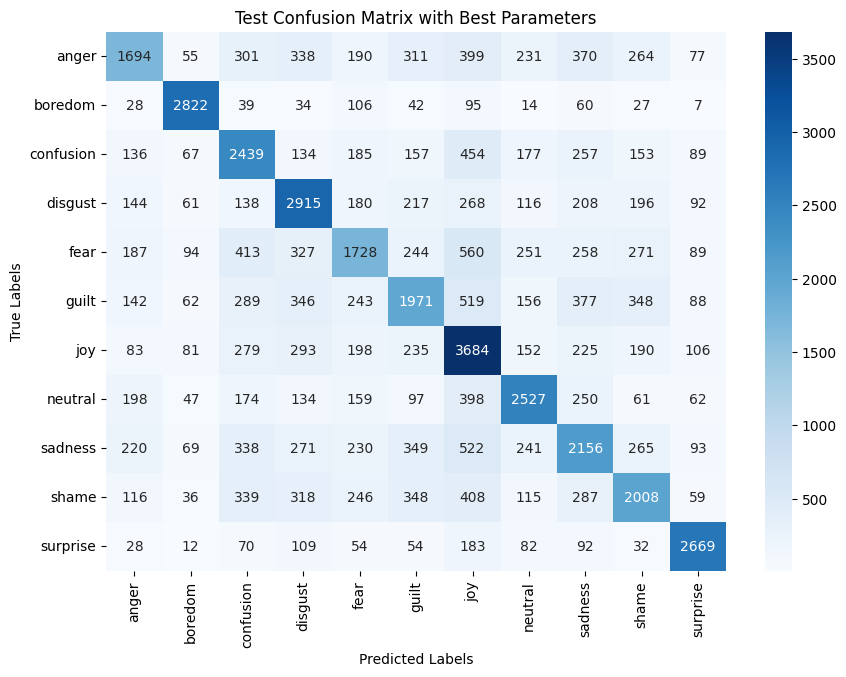

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Step 1: Load the augmented dataset
# Purpose: Load the dataset containing balanced text data and emotion labels.
df = pd.read_csv('Augmented_Emotion_Dataset.csv')

# Step 2: Split the dataset into features (X) and labels (y)
# X: Cleaned text data
# y: Emotion labels
X = df['cleaned_text']
y = df['EMOTION']

# Step 3: Split into train, validation, and test sets (60%-20%-20%)
# Purpose: Divide the dataset into training, validation, and testing subsets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Define a pipeline with TF-IDF and Naive Bayes
# Purpose: Create a streamlined process for text vectorization and model training.
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # TF-IDF with max_features as a tunable parameter
    ('naive_bayes', MultinomialNB())  # Naive Bayes classifier
])

# Step 5: Define the hyperparameter grid
# Purpose: Specify the range of parameters for tuning.
param_grid = {
    'tfidf__max_features': [3000, 5000, 7000],  # Number of TF-IDF features
    'naive_bayes__alpha': [0.1, 0.5, 1.0, 1.5]  # Smoothing parameter for Naive Bayes
}

# Step 6: Perform GridSearchCV with 5-fold cross-validation
# Purpose: Find the best combination of hyperparameters for the pipeline.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Step 7: Display the best parameters and cross-validation score
# Purpose: Summarize the hyperparameter tuning results.
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 8: Evaluate the best model on the training set
# Purpose: Measure the performance of the optimized model on training data.
best_model = grid_search.best_estimator_  # Retrieve the best pipeline
y_train_pred = best_model.predict(X_train)  # Predict on training data
train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate training accuracy
print("\nTraining Accuracy with Best Parameters:", train_accuracy)
print("Classification Report on Training Data:\n", classification_report(y_train, y_train_pred))

# Step 9: Evaluate the model on the validation set
# Purpose: Assess model generalization using validation data.
y_val_pred = best_model.predict(X_val)  # Predict on validation data
val_accuracy = accuracy_score(y_val, y_val_pred)  # Calculate validation accuracy
print("\nValidation Accuracy with Best Parameters:", val_accuracy)
print("Classification Report on Validation Data:\n", classification_report(y_val, y_val_pred))

# Step 10: Evaluate the model on the test set
# Purpose: Measure final performance on unseen test data.
y_test_pred = best_model.predict(X_test)  # Predict on test data
test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate test accuracy
print("\nTest Accuracy with Best Parameters:", test_accuracy)
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Step 11: Confusion matrix visualization
# Purpose: Provide detailed insights into model predictions for the test set.

def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    """
    Plot the confusion matrix to analyze prediction results.
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: Unique class labels
    - title: Title for the confusion matrix plot
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)  # Generate the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)  # Plot heatmap
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Call the function to plot the confusion matrix for the test set
plot_confusion_matrix(y_test, y_test_pred, labels=np.unique(y), title="Test Confusion Matrix with Best Parameters")
